# Investigating Posts that Peform Similarly 
Our client is interested in knowing which posts perform well, can we group these together and find similar factors?

# 1. Import Data

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('clusterdata.csv')

In [3]:
df.head(5)

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,af60c7da-acb4-11ec-880a-a0cec8d2d278,1648512000,short,216,58,5,53,18,12,21,6,43
1,af60c7e4-acb4-11ec-ab31-a0cec8d2d278,1647993600,short,196,45,0,73,35,8,16,25,39
2,af60c7f9-acb4-11ec-bead-a0cec8d2d278,1647907200,short,138,6,13,59,33,5,16,12,13
3,af60c815-acb4-11ec-a572-a0cec8d2d278,1648080000,short,81,9,1,9,34,18,11,4,5
4,af60c80d-acb4-11ec-aeb5-a0cec8d2d278,1647820800,short,166,53,11,75,0,5,17,24,45


In [4]:
df.tail(5)

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
7042,af60c816-acb4-11ec-b01d-a0cec8d2d278,1648166400,photo,293,15,25,173,79,9,15,17,0
7043,af60c7fd-acb4-11ec-8226-a0cec8d2d278,1647993600,short,119,14,0,24,58,8,15,13,1
7044,af60c7e0-acb4-11ec-9163-a0cec8d2d278,1648166400,short,100,9,5,0,46,25,13,8,8
7045,af60c7f6-acb4-11ec-ba47-a0cec8d2d278,1647388800,short,74,10,8,0,38,15,16,0,5
7046,af60c7d9-acb4-11ec-84c2-a0cec8d2d278,1648166400,video,225,46,7,142,23,11,30,19,0


In [5]:
df.describe()

,published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7.047000e+03,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000
mean,1.647947e+09,189.747836,29.725131,9.088548,86.076345,41.369093,14.954449,18.688804,14.030226,14.619980
std,3.499735e+05,76.049968,20.638999,7.797071,67.642081,24.480521,5.047101,8.188357,9.752316,16.082822
min,1.647389e+09,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.647648e+09,121.000000,10.000000,3.000000,20.000000,23.000000,12.000000,13.000000,6.000000,1.000000
50%,1.647994e+09,192.000000,21.000000,7.000000,77.000000,37.000000,15.000000,17.000000,13.000000,8.000000
75%,1.648253e+09,256.000000,50.000000,14.000000,150.000000,57.000000,18.000000,24.000000,20.000000,24.000000
max,1.648512e+09,378.000000,70.000000,37.000000,239.000000,130.000000,34.000000,49.000000,51.000000,67.000000


# 2. Split Data into Training and Testing

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [8]:
train.shape

(4932, 12)

In [9]:
test.shape

(2115, 12)

# 3. Exploratory Data Analysis

The purpose of exploratory Data Analysis is to review data quality, cleansing data, making sure features are well enough to put in the model.

## Review Data

In [14]:
train.dtypes

user_id          object
published         int64
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

looking at the data types of our columns.. 

might choose to do one-hot encoding for object columns

turn published into datetime to extract months, days, weeks, years...

In [15]:
train.post_type.unique()

array(['video', 'short', 'photo', 'text'], dtype=object)

In [16]:
# quick way to check exist any nulls values
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4932 entries, 5324 to 860
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        4932 non-null   object
 1   published      4932 non-null   int64 
 2   post_type      4932 non-null   object
 3   num_reactions  4932 non-null   int64 
 4   num_comments   4932 non-null   int64 
 5   num_shares     4932 non-null   int64 
 6   num_likes      4932 non-null   int64 
 7   num_loves      4932 non-null   int64 
 8   num_wows       4932 non-null   int64 
 9   num_hahas      4932 non-null   int64 
 10  num_sads       4932 non-null   int64 
 11  num_angrys     4932 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 500.9+ KB


## Summary Stats

In [17]:
# summary statistic of training data
train.describe()

,published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,4.932000e+03,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000
mean,1.647942e+09,189.645985,29.677007,9.112125,86.359084,41.145377,14.974858,18.693025,13.957421,14.503447
std,3.526781e+05,76.214512,20.661669,7.760575,67.765511,24.333937,5.114564,8.172636,9.712466,16.037657
min,1.647389e+09,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.647648e+09,120.000000,10.000000,3.000000,20.000000,23.000000,12.000000,13.000000,6.000000,1.000000
50%,1.647994e+09,192.000000,21.000000,7.000000,81.000000,37.000000,15.000000,17.000000,13.000000,8.000000
75%,1.648253e+09,256.000000,50.000000,14.000000,151.000000,57.000000,18.000000,24.000000,20.000000,23.000000
max,1.648512e+09,378.000000,70.000000,37.000000,239.000000,125.000000,34.000000,49.000000,51.000000,64.000000


In [19]:
# 3rd quarter tile 1.5 IQR rule
# 75percentile + 1.5 (75 - 25 percentile)

151 + 1.5*(151-20)

347.5

anything outside of 347 will be consider high outlier

In [20]:
train.describe(include='object')

,user_id,post_type
count,4932,4932
unique,100,4
top,af60c7dc-acb4-11ec-bb60-a0cec8d2d278,short
freq,69,3061


100 users

4932 posts

majority are short posts such as youtube reeds, tiktok

## Plot Distributions

visually inspect to determine if we have relationships between the features

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix # analyze distribution relate to each other quickly

In [22]:
%matplotlib inline

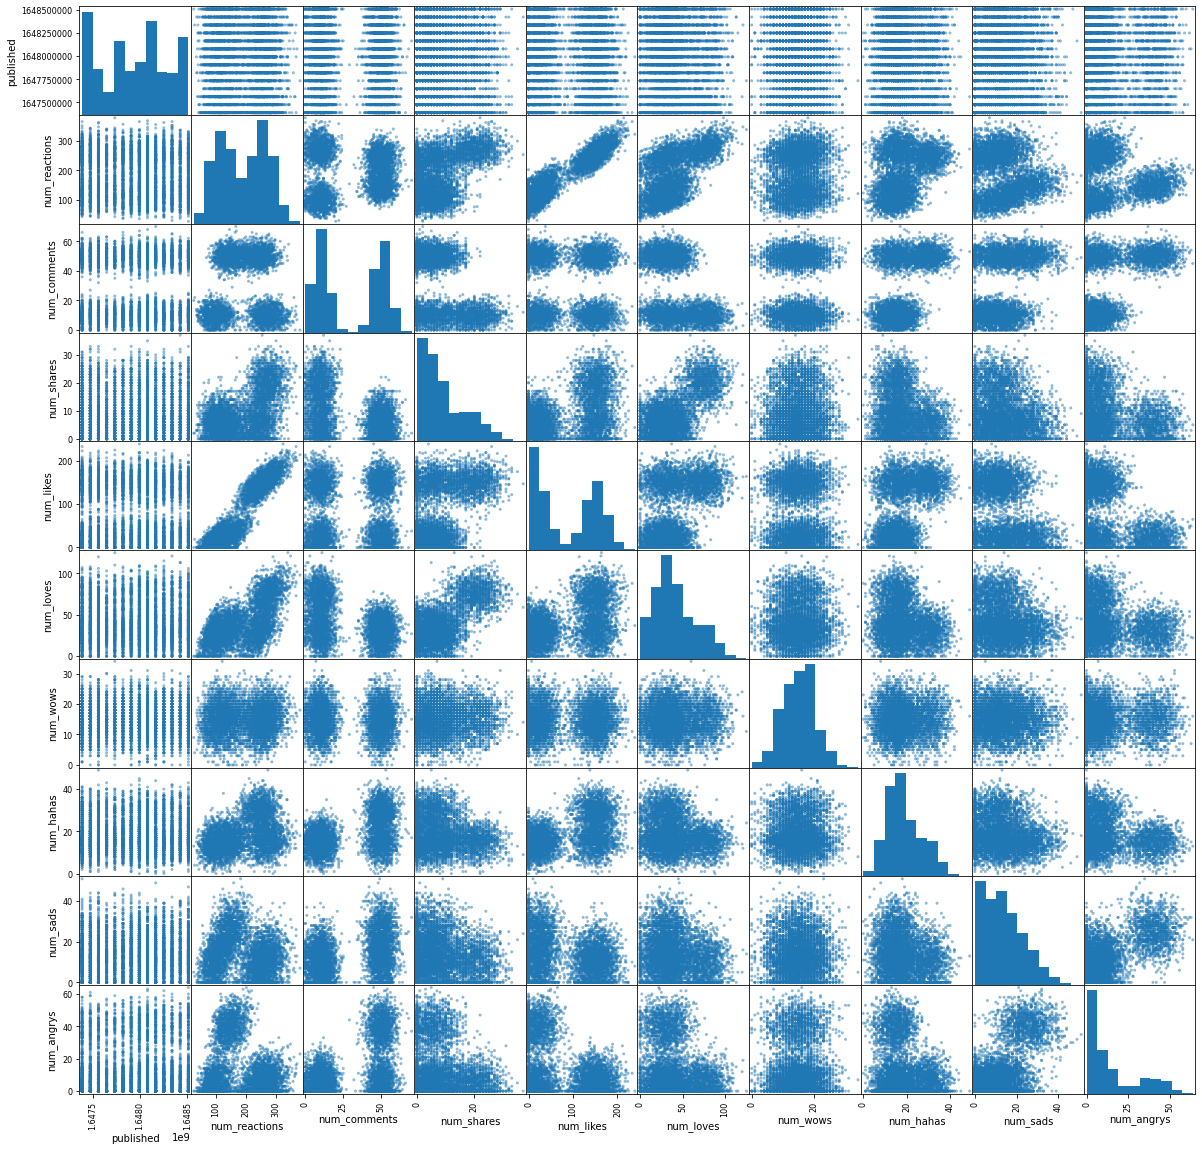

In [23]:
scatter_matrix(train, figsize=(20,20))
plt.show()

scatter matrix is extremely efficient to see patterns emerge in different variables.

We can see that there exist many natural clusters or some linear relationships

## Review Types of Posts

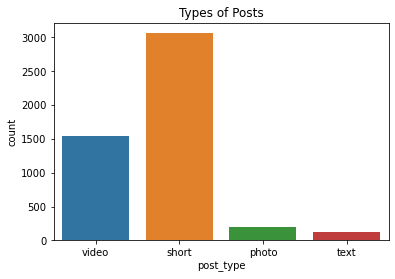

In [24]:
sns.countplot(x='post_type', data=train).set_title('Types of Posts')
plt.show()

short are common type of posts.. 

Think....

Tiktok

Easy to produce daily

Grab user attention

## Can we see any relationships between Post Type and Responses

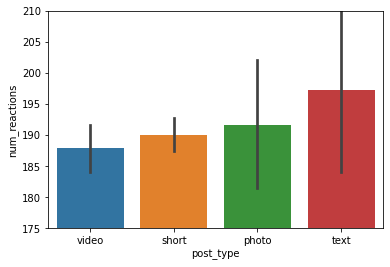

In [28]:
sns.barplot(x='post_type', y="num_reactions", data=train)
plt.ylim((175,210))
plt.show()

dark bar refers to the confidence interval of where the mean lies in..

Photo and text might perform very well, but because they have a wider confidence interval. \
The results of reactions in photo and text might vary a lot \
Video and short should be fairly consistent in mean

## What does status published represent?

In [31]:
train['published']

5324    1647561600
6709    1648166400
1695    1647734400
1095    1648166400
3896    1648166400
           ...    
3772    1648252800
5191    1647475200
5226    1648166400
5390    1648512000
860     1647820800
Name: published, Length: 4932, dtype: int64

What on earth these are??

These might be unit-epoch timestamps.. Pandas can help convert

In [32]:
train['timestamp'] = pd.to_datetime(train['published'], unit='s')

<ipython-input-32-a478e5c6c907>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['timestamp'] = pd.to_datetime(train['published'], unit='s')


## Is there a relationship with time?

In [34]:
train['day'] = train['timestamp'].dt.day
train['day_name'] = train['timestamp'].dt.day_name()
train['monthstart'] = train['timestamp'].dt.is_month_start
train['monthend'] = train['timestamp'].dt.is_month_end
train['quarterstart'] = train['timestamp'].dt.is_quarter_start
train['quarterend'] = train['timestamp'].dt.is_quarter_end
train['month'] = train['timestamp'].dt.month

<ipython-input-34-7df00628f6bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day'] = train['timestamp'].dt.day
<ipython-input-34-7df00628f6bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day_name'] = train['timestamp'].dt.day_name()
<ipython-input-34-7df00628f6bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [35]:
train.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,timestamp,day,day_name,monthstart,monthend,quarterstart,quarterend,month
5324,af60c7dd-acb4-11ec-8785-a0cec8d2d278,1647561600,video,256,56,2,144,41,21,29,6,15,2022-03-18,18,Friday,False,False,False,False,3
6709,af60c803-acb4-11ec-98a3-a0cec8d2d278,1648166400,video,239,50,0,129,55,12,33,0,10,2022-03-25,25,Friday,False,False,False,False,3
1695,af60c7d7-acb4-11ec-88bb-a0cec8d2d278,1647734400,video,99,8,1,10,39,13,18,6,13,2022-03-20,20,Sunday,False,False,False,False,3
1095,af60c7db-acb4-11ec-9ecf-a0cec8d2d278,1648166400,video,162,56,10,27,33,11,16,27,48,2022-03-25,25,Friday,False,False,False,False,3
3896,af60c7ea-acb4-11ec-9a2f-a0cec8d2d278,1648166400,short,253,49,12,152,26,13,32,13,17,2022-03-25,25,Friday,False,False,False,False,3


In [36]:
train.columns[-7:]

Index(['day', 'day_name', 'monthstart', 'monthend', 'quarterstart',
       'quarterend', 'month'],
      dtype='object')

In [38]:
# this dataset has only got 1 month of data
# not much details can be extracted from this feature
train.month.unique()

array([3], dtype=int64)

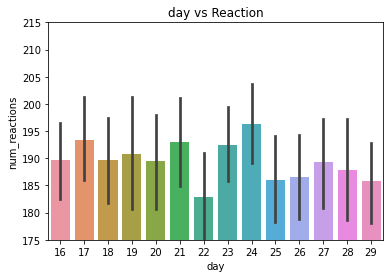

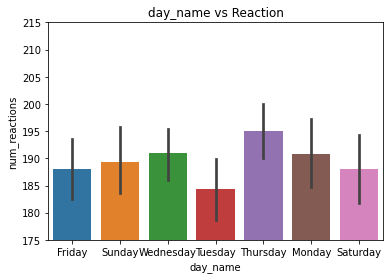

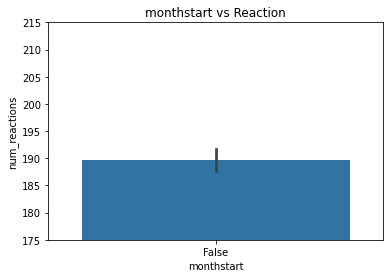

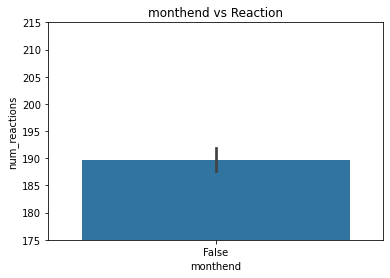

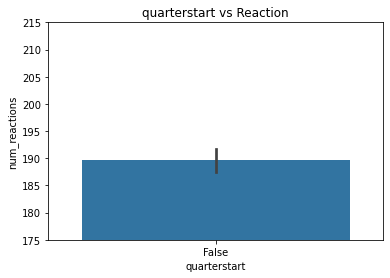

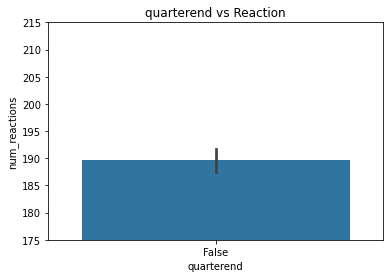

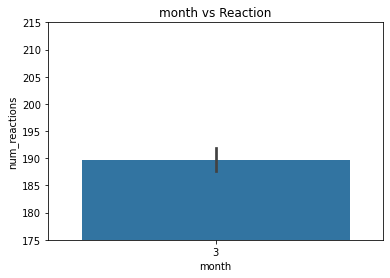

In [40]:
for col in train.columns[-7:]:
    sns.barplot(x=col, y='num_reactions', data=train).set_title(f'{col} vs Reaction')
    plt.ylim((175, 215))
    plt.show()

In [41]:
#since this data has only 1 month, not much useful can be extracted hence we will drop these columns..

train = train.drop(['timestamp', 'published', 'day', 'monthstart', 'monthend', 'quarterstart', 'quarterend', 'month'], axis=1)

In [42]:
train.columns

Index(['user_id', 'post_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'day_name'],
      dtype='object')

# 4. Data Preprocessing

## Scale Features

In [45]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [46]:
train.dtypes

user_id          object
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
day_name         object
dtype: object

In [47]:
scaler = StandardScaler()
#standardscaler = mean 0, variance 1, help cluster perform better
scaled = scaler.fit_transform(train.drop(['user_id', 'post_type', 'day_name'], axis=1).to_numpy())

In [49]:
pd.DataFrame(scaled).describe()

,0,1,2,3,4,5,6,7,8
count,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03,4.932000e+03
mean,1.305615e-17,-3.993381e-17,1.358684e-16,-1.264646e-16,1.173253e-16,5.632153e-17,-1.906873e-16,-5.852757e-19,5.766091e-17
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-2.134272e+00,-1.436477e+00,-1.174275e+00,-1.274510e+00,-1.691035e+00,-2.928182e+00,-2.287502e+00,-1.437208e+00,-9.044287e-01
25%,-9.139079e-01,-9.524401e-01,-7.876665e-01,-9.793450e-01,-7.457575e-01,-5.817035e-01,-6.966666e-01,-8.193828e-01,-8.420691e-01
50%,3.088983e-02,-4.199993e-01,-2.721885e-01,-7.909078e-02,-1.703710e-01,4.916251e-03,-2.071788e-01,-9.858650e-02,-4.055522e-01
75%,8.707101e-01,9.837082e-01,6.298980e-01,9.539878e-01,6.516097e-01,5.915360e-01,6.494249e-01,6.222098e-01,5.298414e-01
max,2.471617e+00,1.951782e+00,3.593896e+00,2.252715e+00,3.446344e+00,3.720174e+00,3.708724e+00,3.814308e+00,3.086584e+00


## One Hot Encode Status Type

In [50]:
train.dtypes

user_id          object
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
day_name         object
dtype: object

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
onehot = OneHotEncoder(handle_unknown='ignore')
encoded = onehot.fit_transform(train[['user_id', 'post_type', 'day_name']]).toarray()

In [55]:
encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0.])

In [59]:
len(train['user_id'].unique())

100

In [61]:
X_train = np.c_[scaled, encoded]

In [63]:
X_train[0]

array([ 0.87071007,  1.27413044, -0.91653595,  0.85067994, -0.00597486,
        1.17815566,  1.26128462, -0.81938283,  0.03096484,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

# 5. Modelling

## Fit Models with a Range of Clusters

In [64]:
# Model choice: KMeans
from sklearn.cluster import KMeans

In [65]:
fit_models = {}
for k in range(2, 20):
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    fit_models[k] = model

In [66]:
fit_models

{2: KMeans(n_clusters=2),
 3: KMeans(n_clusters=3),
 4: KMeans(n_clusters=4),
 5: KMeans(n_clusters=5),
 6: KMeans(n_clusters=6),
 7: KMeans(n_clusters=7),
 8: KMeans(),
 9: KMeans(n_clusters=9),
 10: KMeans(n_clusters=10),
 11: KMeans(n_clusters=11),
 12: KMeans(n_clusters=12),
 13: KMeans(n_clusters=13),
 14: KMeans(n_clusters=14),
 15: KMeans(n_clusters=15),
 16: KMeans(n_clusters=16),
 17: KMeans(n_clusters=17),
 18: KMeans(n_clusters=18),
 19: KMeans(n_clusters=19)}

## Select Best Cluster size using Elbow Method

In [67]:
results = []
for k, model in fit_models.items():
    res = model.inertia_
    results.append(res)

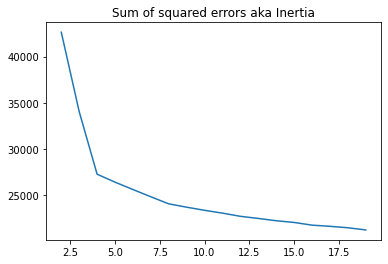

In [69]:
plt.title("Sum of squared errors aka Inertia")
plt.plot(range(2,20), results)
plt.show()

to zoom in a lot more to see the curve

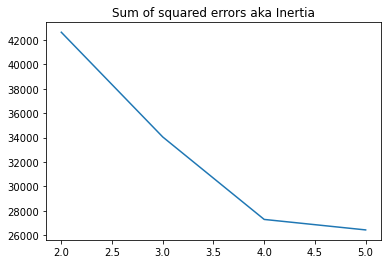

In [72]:
plt.title("Sum of squared errors aka Inertia")
plt.plot(range(2,6), results[:4])
plt.show()

# 6. Evaluate Models

## Choose Model and Make Predictions

In [73]:
model = fit_models[4]

In [76]:
def transform(df, onehot, scaler):
    X = df.copy()
    X['timestamp'] = pd.to_datetime(X['published'], unit='s') # convert timestamp into readable time
    X['day_name'] = X['timestamp'].dt.day_name() # extract the days of week, monday - sunday
    X = X.drop(['timestamp', 'published'], axis=1) # drop the unnessary columns

    encoded = onehot.transform(X[['user_id', 'post_type', 'day_name']]) # onehot encode object columns
    scaled = scaler.transform(X.drop(['user_id', 'post_type', 'day_name'], axis=1).to_numpy()) # standard scaler numerical columns

    return np.c_[scaled, encoded.toarray()] # concat together

In [77]:
X_test = transform(test, onehot, scaler)
X_test

array([[-1.28132929, -1.29126606, -0.14331898, ...,  0.        ,
         0.        ,  0.        ],
       [-1.05825204, -0.51680674, -0.52992746, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.85758788, -0.75882527,  0.37215901, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.65804154, -0.9524401 ,  0.11442002, ...,  0.        ,
         1.        ,  0.        ],
       [-0.45463125,  0.88690078, -1.04540545, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.71324377, -0.66201786,  1.27424548, ...,  0.        ,
         0.        ,  0.        ]])

In [79]:
X_train.shape

(4932, 120)

In [78]:
X_test.shape

(2115, 120)

In [80]:
clusters = model.predict(X_test)
test['cluster'] = clusters
test.head()

<ipython-input-80-dc63e2e5721b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cluster'] = clusters


,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
3268,af60c7fb-acb4-11ec-bab3-a0cec8d2d278,1647820800,video,92,3,8,15,36,11,14,4,12,2
6576,af60c806-acb4-11ec-8e18-a0cec8d2d278,1647907200,video,109,19,5,27,39,18,19,0,6,2
2181,af60c7dc-acb4-11ec-bb60-a0cec8d2d278,1647993600,short,255,14,12,137,67,12,21,11,7,0
3245,af60c7d8-acb4-11ec-9b66-a0cec8d2d278,1647388800,video,278,14,26,170,61,6,15,11,15,0
3910,af60c822-acb4-11ec-8340-a0cec8d2d278,1648339200,video,137,46,6,23,28,19,8,24,35,3


In [81]:
# how many different clusters we have?
test['cluster'].unique()

array([2, 0, 3, 1])

we got 4 different clusters, next we will try to visualize it..

## Are cluster 0 posts performing the best?

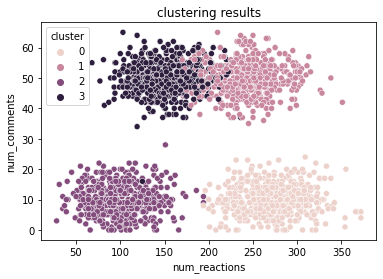

In [83]:
plt.title("clustering results")
sns.scatterplot(x='num_reactions', y='num_comments', hue="cluster", data=test)
plt.show()

cluster 1 tends to have a higher number of reactions and number of comments than the other three clusters.


We can tell the social media customers to look into cluster 1 and flag these good performance posts. \
We can test our hypothesis through hypothesis testing.

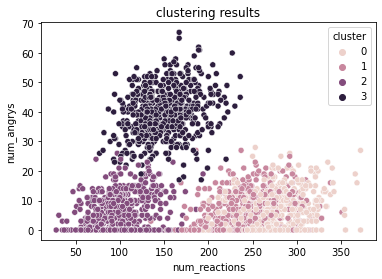

In [84]:
plt.title("clustering results")
sns.scatterplot(x='num_reactions', y='num_angrys', hue="cluster", data=test)
plt.show()

cluster 3 receive a lot of angry reactions which cause cluster 3 to have a lot of comments

## Does Cluster One have a higher number of Reactions on Average?
A hypothesis testing for customer to see if this is the right direction to drive performance in posts.
- Alternative specifies what the alternative hypothesis represents
- two-sided: $H_0:a=b$, $H_a:a \neq b$
- less: $H_0:a>=b$, $H_a:a<b$
- greater: $H_0:a<=b$, $H_a:a>b$                

In [85]:
from scipy.stats import ttest_ind # t-test 

In [90]:
# sample 1: cluster 1 number of reactions
cluster_one_samples = test[test['cluster'] == 1]['num_reactions']

# Sample 2: cluster 0,2,3 number reactions
cluster_other_samples = test[test['cluster'] != 1]['num_reactions']
cluster_two_samples = test[test['cluster'] == 0]['num_reactions']

# Hypothesis Test
1. 95%, alpha 1-0.95 = 0.05
2. Formulate hypotheses

H0: Cluster 1 number of reactions <= Cluster 1,2,3 number of reactions\
HA: Cluster 1 number of reactions > Cluster 1,2,3 number of reactions\

3. if pvalue < 0.05, reject our null hypothesis whih support alternative hypothesis

In [88]:
compare = ttest_ind(cluster_one_samples, cluster_other_samples, alternative='greater', equal_var=False)

In [91]:
compare2 = compare = ttest_ind(cluster_one_samples, cluster_two_samples, alternative='greater', equal_var=False)

In [89]:
compare.pvalue

1.0184685016382316e-147

In [92]:
compare2.pvalue

1.0

reject the null hypothesis, lending support to alternative hypothesis

- Cluster one is performing uniquely well versus the other clusters
- Cluster two seems to be performing well as well, when compare to cluster one.

We can tell our customer to look into these 2 clusters and see what they do uniquely to help drive better performance

# 7. Deploy

## Score on all Data

In [93]:
X = transform(df, onehot, scaler)

In [94]:
clusters = model.predict(X)

In [95]:
df['cluster'] = clusters
df.to_csv('cluster_results.csv')

In [96]:
df.head(5)

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,af60c7da-acb4-11ec-880a-a0cec8d2d278,1648512000,short,216,58,5,53,18,12,21,6,43,3
1,af60c7e4-acb4-11ec-ab31-a0cec8d2d278,1647993600,short,196,45,0,73,35,8,16,25,39,3
2,af60c7f9-acb4-11ec-bead-a0cec8d2d278,1647907200,short,138,6,13,59,33,5,16,12,13,2
3,af60c815-acb4-11ec-a572-a0cec8d2d278,1648080000,short,81,9,1,9,34,18,11,4,5,2
4,af60c80d-acb4-11ec-aeb5-a0cec8d2d278,1647820800,short,166,53,11,75,0,5,17,24,45,3


## Install Dependencies for Dash